# __Assigning hydraulic boundary conditions__

### __Problem statement__ 

In this tutorial, we will impose hydraulic boundary conditions for the purpose of flow computations on a DFN.
<br>
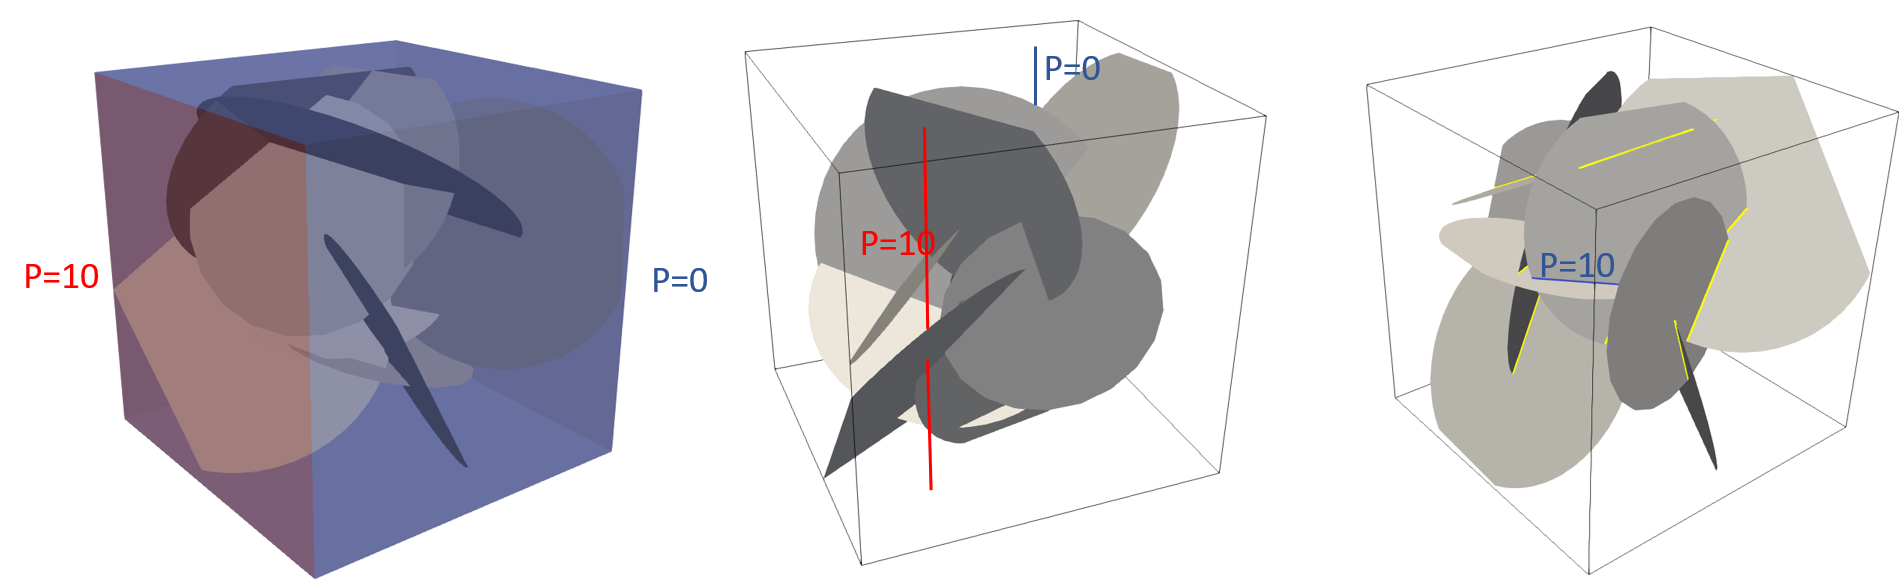conditions on different objects
 <br>
Application of boundary 

### __Theorical background__ 

Two kinds of boundary conditions are implemented in DFN.Lab:
* Dirichlet: fixed hydraulic head
* Neuman: fixed flux (derivative of the hydraulic head)

### __What will you learn ?__

To implement:
- Permeameter boundary conditions (fixed pressure and flow on system borders)
- Boundary conditions on borehole
- Boundary conditions on an object that intersect fractures 

### __DFN.Lab model__

The required modules are __Basis__ and __BoundaryCondition__.
<br>
We use [_pyvista_](https://docs.pyvista.org) for embedded visualization in our notebook.
<br>
We use [_matplotlib_](https://matplotlib.org) and [_mplstereonet_](https://github.com/joferkington/mplstereonet) to construct plot from networks analysis. <br/>

We build a DFN by importing fractures from file, thereafter, we define the intersections with boundaries or object over which boundary conditions are assigned.

## __Example1: Permeameter boundary conditions__

In [1]:
import dfnlab.IO as io
import dfnlab.Basis as basis
import os 

We define a model volume and a DFN which we populate with fractures saved on file (Ktest.disk). 

In [2]:
the_system = basis.System()
the_system.buildParallelepiped(center=[0, 0, 0], L1=1.)
fnet = basis.DFN(the_system)
io.load_DFN_file(fnet,filename='sources/Ktest.disk', format="disk")
fnet.computeIntersections()

The first example, a fixed hydraulic head at border 0 and 1, the borders are defined as:
* 0 : -x face
* 1 : x face
* 2 : -y face
* 3 : y face
* 4 : -z face
* 5 : z face

The hydraulic head is set to 10 units at $x_{max}$ and 0 at $x_{min}$, at other boundaries, the flux is zero. 

In [3]:
import dfnlab.BoundaryCondition as bc

boundaries = bc.DomainBoundaryCondition()

boundaries.setFixedPressure(dfn=fnet, idBorder=0, P=10)
boundaries.setFixedPressure(dfn=fnet, idBorder=1, P=0)

boundaries.setFixedFlux(dfn=fnet, idBorder=2, P=0)
boundaries.setFixedFlux(dfn=fnet, idBorder=3, P=0)
boundaries.setFixedFlux(dfn=fnet, idBorder=4, P=0)
boundaries.setFixedFlux(dfn=fnet, idBorder=5, P=0) 

The previous lines can be reduced to one, the second argument is the hydraulic head difference between boundaries, the third is the direction
* 1 : x direction
* 2 : y direction
* 3 : z direction

In [4]:
boundaries.setPermeameterCondition(fnet, 10, 1)

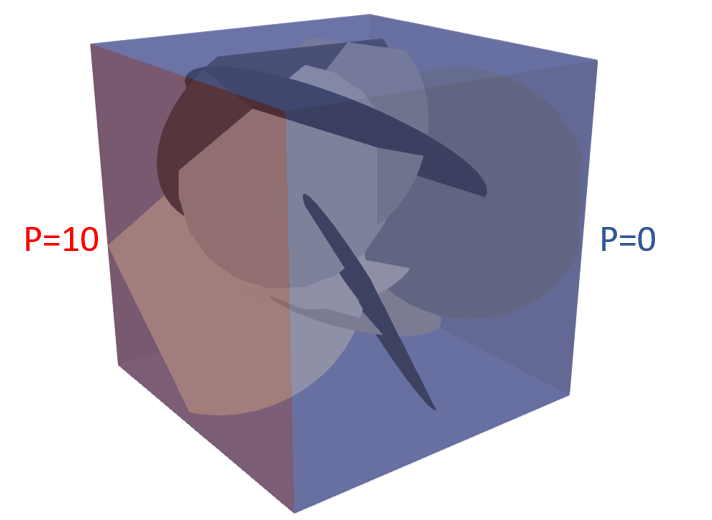

## __Example 2: Boundary conditions on wells__

It is also possible to add wells with fixed hydraulic head inside the DFN using the following syntax:

In [5]:
positionWell1Begin = [0.25,0.25,0.5]
positionWell1End = [0.25,0.25,-0.5]
well1= basis.Well1D(pbegin=positionWell1Begin, pend=positionWell1End)   
the_system.addGeometry(well1)

positionWell2Begin = [-0.25,-0.25,0.5]
positionWell2End = [-0.25,-0.25,-0.5]
well2= basis.Well1D(pbegin=positionWell2Begin, pend=positionWell2End)   
the_system.addGeometry(well2)

We apply a fixed charge 10 units on the first well and -10 units on well2, this mimic a doublet pumping

In [6]:
boundaries.setWellInBC(dfn=fnet, P=10, well=well1)
boundaries.setWellInBC(dfn=fnet, P=-10, well=well2)

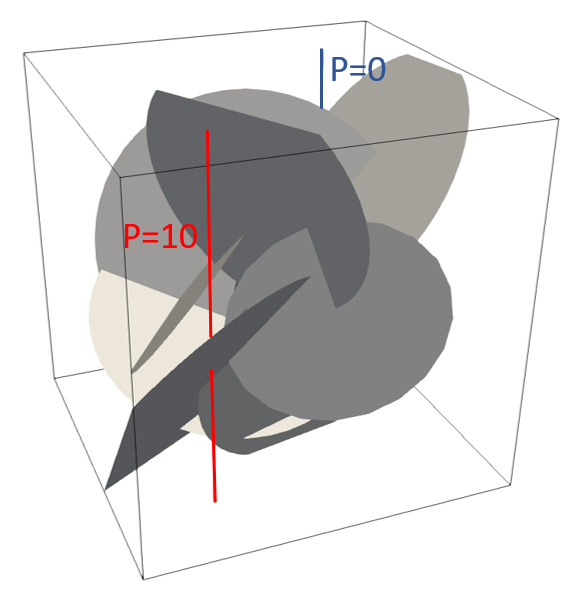

## __Example 3: Boundary conditions on any object__

Here we show the syntax to apply boundary conditions on any object such as tunnels, borders, wells or even fracture intersections.
<br>
In this example, we will define a boundary condition to an intersection between two fractures:

In [7]:
intersection  = fnet.getIntersectionFracture(0)

In [8]:
bcondition = bc.BoundaryCondition(BcType="dirichlet",P=5)
boundaries.addBoundaryCondition(intersection,bcondition)

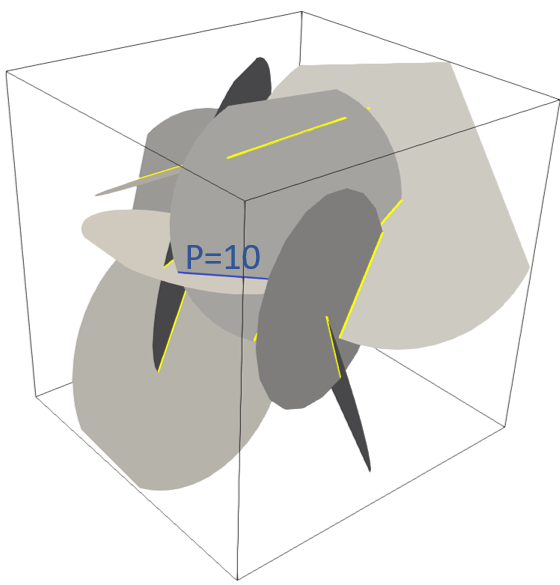